# HEART RATE ESTIMATION

Seismocardiography([SCG](https://www.ncbi.nlm.nih.gov/pubmed/24111357)) is a very promising technique to measure Heart Rate (HR) and Respiratory Rate (RR) with the detector positioned above sternum. It is generally based on accelerometer and gyroscope readings or a combination of them. 

Ballistocardiography([BCG](https://en.wikipedia.org/wiki/Ballistocardiography)) is an another technique to estimate heart and respiratory rate with combination of both accelerometer and gyroscope. It is an indirect evaluation of HR and RR since the contact between the device and the body of the subject is not required (e.g., accelerometer platform mounted under the slats of the bed).   
  
MuSe(Multi-Sensor miniaturized, low-power, wireless [IMU](https://en.wikipedia.org/wiki/Inertial_measurement_unit)) is an Inertial Measurement Unit (IMU) provide by [221e](https://www.221e.com). In the context of this project, It allows to record the inertial data necessary for the estimation of SCG and BCG.

The goal of this assignment is to estimate the heart rate of an healthy subject, given linear acceleration and angular velocity measurements recorded by using the aforementioned MuSe platform. 
The study must be performed on two datasets: the first is the compulsory one (**center_sternum.txt**) while the second is left at the discretion of the group, among those made available for the assignment.

**N.B: Remember that normal beat is around [40-100] bpm.**


## Dataset

The data is provided in .txt file. During this study two healthy subjects were involved with their informed consent. The first dataset was recorded on one subject, while all the other datasets were recorded on the second subject. 

This is the first mandatory file:

* **center_sternum.txt**: MuSe placed on the center of the sternum. The subject was lying supine on his left and right side, respectively. 


Choose one of the following files in order to complete the task.

1. **1_Stave_supine_static.txt**: Sensor placed on a bed stave, under the mattress at the level of the chest. The subject was lying supine on his left and right side. 
* **2_Mattress_supine.txt**: Sensor placed on the mattress, near one corner but not under the pillow. The subject laid in the same position as above. 
* **3_Subject_sitting_chair.txt**: Sensor placed on the desk: the subject, sitting on a chair, leaned forearms and hands on the desk. 
* **4_Chest_sweater.txt**: Sensor placed on the subject chest directly on a sweater. 
* **5_Under_chair.txt**: Subject sitting on a chair, sensor placed under the seat of the chair. 

All .txt files give 16 columns index, in particular: 

* Log Freq stands for the acquisition  in Hz (i.e., sampling interval is constant).
* AccX, AccY, AccZ are the measured magnitude of linear acceleration along each axis.
* GyroX, GyroY, GyroZ are the measured magnitude of angular velocity along each axis.
* MagnX, MagnY, MagnZ are the measured magnitude of magnetic field along each axis.
* qw, qi, qj, qk are the quaternion components, representing the spatial orientation of the Muse system.

Each dataset includes, in addition to the data, one file containing the adopted configuration of the MuSe(**README1.txt** for the first measurement, and in **README_5.txt** for the other measurement).
 


## Assignment



1. Data preparation:

    1.1. Load the txt file and select only the columns you are interesting in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )
    
    1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.
    
    1.3. In order to make an appropiate work, decide if take care about some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.  


    
2. Time and frequency analysis:

    2.1. Statistical analysis: provide a statistical description of the chosen dataset. Statistical descriptors includes for example mean, median, variance, standard deviation, 25th and 75th percentiles, and correlation coefficients. Investigate what could be the most interesting descriptors for this type of data, motivating the choices.
    
    2.2. Fourier Analysis: Perform a frequency analysis of the data. Look at the spectrum and explain what you see. Use this step in order to properly design the filters in the following step. 



3. Filter:
    
    Implement your own filter, trying to extrapolate heart rate signal. Hint:
    
    (a) Directly from Fourier Analysis, antitrasform data looking for the most interesting frequency band.
    
    (b) Choose the appropriate Lowpass/Bandpass/Highpass filter.
    
    (c) Wavelet trasform (a powerfull instrument that make a time and frequency analysis of signal).
    
    (d) Find another method by yourselves.
    
    Motivate your choice.
    
    
4. Metrics:

    4.1. Heart Beat Per Minute(BPM): extrapolate BPM, make an histogram of the result. Does it follow a partiular distribution? 
    
    4.2. Heart Rate Variability(HRV): extrapolate HRV, explain why this parameter is important, and plot the results.



5. (OPTIONAL) Algorithm: Elaborate a simple algorithm to extrapolate heart beat even when filter failed (e.g. look at particular threshold...).  



6. Conclusion: 

    Summarise the obtained results, in particular making a comparison between the two files analysed. Highlight limitation and critical issues encountered during the work, motivating the most relevant contribution given by your solution.




**N.B: Indicate the contribution, to achieving the result, of each member of the group.**


Data preparation:

1.1. Load the txt file and select only the columns you are interesting in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )

1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.

1.3. In order to make an appropiate work, decide if take care about some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd1 = pd.read_csv('center_sternum.txt', delimiter='\t')
center_sternum = pd.DataFrame(pd1)
display(center_sternum)
center_sternum.describe()

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
count,16506.0,16506.0,1.650600e+04,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000
mean,5.0,200.0,1.576223e+09,35.603752,121.754422,-897.001465,-1.885665,3.636535,-0.818354,-231.327881,-432.637405,397.903005,0.063803,0.490530,-0.764329,-0.039947
std,0.0,0.0,2.189258e+01,232.624330,62.077114,215.230574,13.223364,17.399954,10.595643,67.200320,16.526077,123.871453,0.144073,0.197328,0.326346,0.057694
min,5.0,200.0,1.576223e+09,-722.118000,-387.838000,-1731.973000,-359.496200,-213.557300,-126.351100,-511.000000,-559.000000,-178.000000,0.004428,-0.622059,-0.892911,-0.096347
25%,5.0,200.0,1.576223e+09,-35.258000,111.020000,-958.310000,-2.839695,3.206107,-1.175573,-213.000000,-434.000000,427.000000,0.021518,0.493858,-0.859676,-0.060732
50%,5.0,200.0,1.576223e+09,-29.585000,115.900000,-948.733000,-2.137405,3.664122,-0.854962,-212.000000,-432.000000,429.000000,0.024636,0.529649,-0.836619,-0.059511
75%,5.0,200.0,1.576223e+09,-22.692000,120.475000,-937.692000,-1.206107,4.213740,-0.549618,-211.000000,-431.000000,433.000000,0.027304,0.564768,-0.813227,-0.057619
max,5.0,200.0,1.576223e+09,1228.601000,1004.609000,3087.000000,381.160300,349.816800,187.603100,-130.000000,-289.000000,481.000000,0.792622,0.624806,0.921293,0.251900


In [3]:
pd2 = pd.read_csv('2_Mattress_supine.txt', delimiter='\t')
mat_supine = pd.DataFrame(pd1)
display(mat_supine)
mat_supine.describe()
mat_supine.columns

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


Index(['Log Mode', 'Log Freq', 'Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ', 'qw', 'qi', 'qj', 'qk'],
      dtype='object')

In [4]:
# test code
# # df.loc[:,['A','B']]
# aa = mat_supine.loc[:,['Log Freq','AccX']]
# display(aa)

# # df.drop(['E prime'], axis=1)

# bb = mat_supine.drop(['Log Freq'], axis = 1)
# display(bb)

#len(center_sternum_d.index)

The goal of this assignment is to estimate the heart rate of a healthy subject, given linear acceleration and angular velocity measurements 

* Log Freq stands for the acquisition  in Hz (i.e., sampling interval is constant).
* AccX, AccY, AccZ are the measured magnitude of linear acceleration along each axis.
* GyroX, GyroY, GyroZ are the measured magnitude of angular velocity along each axis.
* MagnX, MagnY, MagnZ are the measured magnitude of magnetic field along each axis.
* qw, qi, qj, qk are the quaternion components, representing the spatial orientation of the Muse system.


In [5]:
frq = center_sternum['Log Freq'].unique()[0]
print(frq)

center_sternum_d = center_sternum.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
# display(center_sternum_d)
center_sternum_d.head(5)
center_sternum_d.insert(0, "Time", np.arange(0,(len(center_sternum_d.index)/frq),(1/frq)))
center_sternum_d

200


,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
1,0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
2,0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
3,0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
4,0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
16502,82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
16503,82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763
16504,82.520,965.630,300.852,-56.242,0.702290,3.664122,-1.587786


1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.

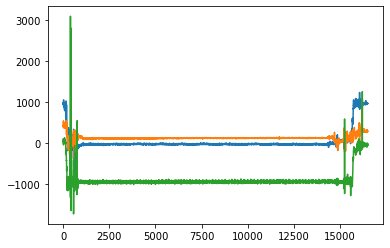

In [6]:
plt.plot(center_sternum_d['AccX'])
plt.plot(center_sternum_d['AccY'])
plt.plot(center_sternum_d['AccZ'])

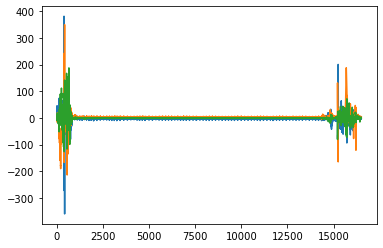

In [7]:
plt.plot(center_sternum_d['GyroX'])
plt.plot(center_sternum_d['GyroY'])
plt.plot(center_sternum_d['GyroZ'])

In [8]:
#sns.pairplot(center_sternum_d)

In [9]:
# timestamp mattress 
#mat_supine.Timestamp.unique()

In [10]:
#mat_supine.Timestamp.value_counts()

1.1
- we dropped magnetisation, spatial orientation and log mode (maybe timestamp too)
- we dropped time stamp and log freq, instead we use Time column to represent time in secs instead of arbitrary unit.
- timestamp have repetitive values that may represent a meaningful division of the data, but there's no info that supports it for now (ignore this)

1.2
- so we just plotted all the data per type, and saw similar behaviours for each type of measurement (X,Y,Z corresponing to the same physical meaning behave in the same way)
- from such behaviours, we-re going to have to crop a bit from the beginning and from the end of the data: **we need to find a criteria (based on the histogram) for cropping of the data from beginning and end**

1.3
- to decide which axis and info to keep analysing, perform a PCA (since the professor is speaking about combinations of the components, what about considering spherical coordinates?)
2.1
- statistical description of data
- FFT

In [11]:
#doing the same for mattress data

frq = mat_supine['Log Freq'].unique()[0]

ms = mat_supine.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
# display(center_sternum_d)
ms.head(5)
ms.insert(0, "Time", np.arange(0,(len(ms.index)/frq),(1/frq)))
ms

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
1,0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
2,0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
3,0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
4,0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
16502,82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
16503,82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763
16504,82.520,965.630,300.852,-56.242,0.702290,3.664122,-1.587786


# Adding offsets, plotting data, dropping some data

Please add here ok cells of work before so it will be not messy now

In [12]:
########24.01.22 upd

###PREVIOUSLY NO COMSIDERATION OF OFFSETS
#added here to accelerometer 


### center sternum README1
acc_offsets1 = np.array([-3.929942, -13.74679, 60.67546])

cs = center_sternum_d
cs['AccX'] += acc_offsets1[0]
cs['AccY'] += acc_offsets1[1]
cs['AccZ'] += acc_offsets1[2]

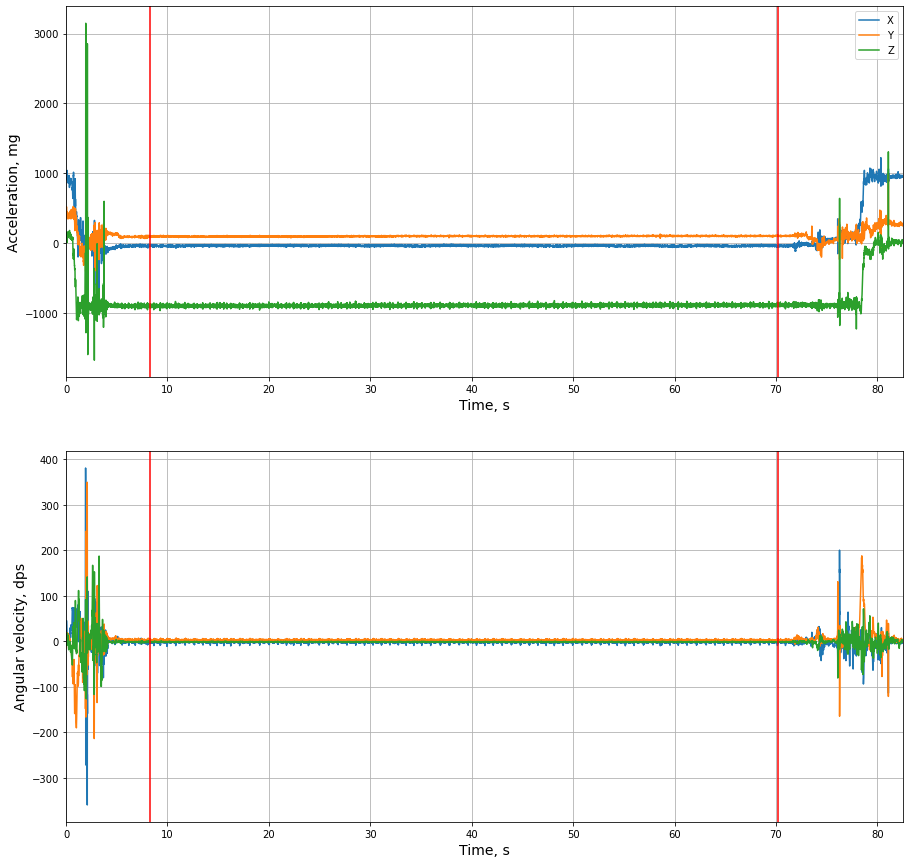

In [13]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)

down_limit = 0.1*max(cs['Time']) #I was exploring it visually with step 0.05
up_limit = 0.85*max(cs['Time'])

ax[0].plot(cs['Time'], cs['AccX'], label='X')
ax[0].plot(cs['Time'], cs['AccY'], label='Y')
ax[0].plot(cs['Time'], cs['AccZ'], label='Z')
ax[0].set_xlim(min(cs['Time']),max(cs['Time']))
ax[0].set_xlabel('Time, s', fontsize=14)
ax[0].set_ylabel('Acceleration, mg', fontsize=14)
ax[0].axvline(down_limit, color='red')
ax[0].axvline(up_limit, color='red')
ax[0].legend()
ax[0].grid()


ax[1].plot(cs['Time'], cs['GyroX'], label='X')
ax[1].plot(cs['Time'], cs['GyroY'], label='Y')
ax[1].plot(cs['Time'], cs['GyroZ'], label='Z')
ax[1].set_xlim(min(cs['Time']),max(cs['Time']))
ax[1].set_xlabel('Time, s', fontsize=14)
ax[1].set_ylabel('Angular velocity, dps', fontsize=14)
ax[1].axvline(down_limit, color='red')
ax[1].axvline(up_limit, color='red')
ax[1].grid()

I found another gyroscope description, dps - dimensionless numbers.
IDK if we use it, but conversion should be like
$w[rad*s^{-1}] = \frac{w_{raw}*200}{2^{15}}*\frac{\pi}{180}$

200 is taken from README1

In [14]:
#dropping data

cs.drop(cs[ cs['Time']<= down_limit].index, inplace=True)
cs.drop(cs[ cs['Time']>= up_limit].index, inplace=True)
cs

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
1651,8.255,-40.224942,103.98321,-908.37054,-3.297710,3.847328,-0.687023
1652,8.260,-36.869942,106.36221,-924.90154,-3.801527,4.381680,-0.595420
1653,8.265,-47.483942,93.06421,-886.65454,-3.847328,4.351145,0.045802
1654,8.270,-36.320942,97.02921,-902.94154,-3.954199,4.412214,0.259542
1655,8.275,-37.662942,95.19921,-894.64554,-4.167939,3.480916,0.015267
...,...,...,...,...,...,...,...
14025,70.125,-48.825942,116.48821,-910.20054,-3.312977,1.984733,-0.977099
14026,70.130,-46.934942,114.78021,-900.19654,-7.282443,1.938931,-1.480916
14027,70.135,-40.041942,110.44921,-852.06754,-8.870229,2.564886,-1.450382
14028,70.140,-47.239942,108.86321,-844.74754,-7.129771,3.648855,-1.389313


# Analysis of Acc_Z

Text(0, 0.5, 'Acceleration, mg')

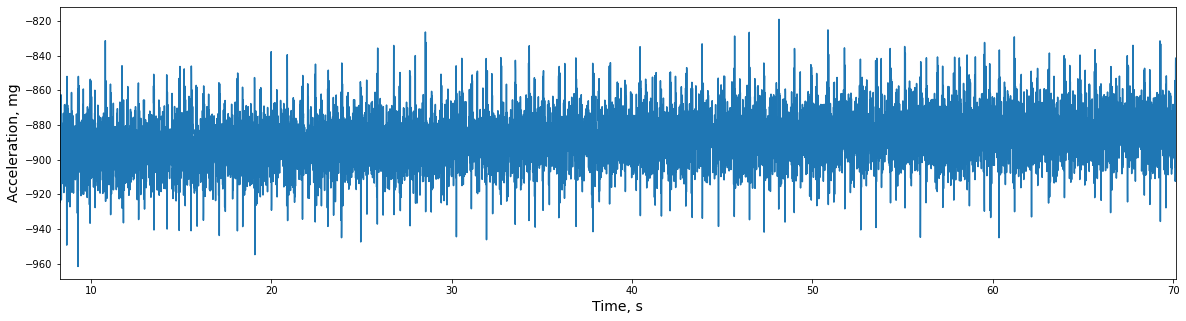

In [15]:
#statistical analysis of acc_z

plt.figure(figsize=(20,5))
plt.plot(cs['Time'], cs['AccZ'])
plt.xlim(min(cs['Time']),max(cs['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Acceleration, mg', fontsize=14)

In [16]:
print('Statistical analysis')
print(cs['AccZ'].describe())
print('median', cs['AccZ'].median())
print('variance', cs['AccZ'].var())

Statistical analysis
count    12379.000000
mean      -888.587312
std         14.502768
min       -961.684540
25%       -897.268540
50%       -888.972540
75%       -880.737540
max       -819.066540
Name: AccZ, dtype: float64
median -888.97254
variance 210.3302909781988


# All data statistical quantities

In [17]:
stq = pd.DataFrame({'mean': cs.mean(),
                   'median': cs.median(),
                   'variance': cs.var(),
                   'standard deviation': cs.std(),
                   '25th percentile': cs.quantile(q=0.25),
                   '75th percentiles': cs.quantile(q=0.75)})
print(stq)

             mean      median    variance  standard deviation  \
Time    39.200000   39.200000  319.275042           17.868269   
AccX   -34.677682  -34.612942   49.297451            7.021214   
AccY   101.770017  101.909210   28.627036            5.350424   
AccZ  -888.587312 -888.972540  210.330291           14.502768   
GyroX   -2.089004   -2.152672    2.061175            1.435679   
GyroY    3.682129    3.633588    0.524791            0.724425   
GyroZ   -0.865798   -0.854962    0.134305            0.366476   

       25th percentile  75th percentiles  
Time         23.727500         54.672500  
AccX        -39.309942        -29.976942  
AccY         98.310210        105.325210  
AccZ       -897.268540       -880.737540  
GyroX        -2.687023         -1.480916  
GyroY         3.267176          4.000000  
GyroZ        -1.099237         -0.625954  


In [18]:
cs.corr()

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
Time,1.000000,-0.086022,0.524123,0.262656,-0.039175,-0.054312,-0.026903
AccX,-0.086022,1.000000,-0.176537,-0.405237,0.207113,0.008637,0.024947
AccY,0.524123,-0.176537,1.000000,0.171794,-0.053377,-0.008125,-0.142546
AccZ,0.262656,-0.405237,0.171794,1.000000,-0.080377,0.115635,0.019117
GyroX,-0.039175,0.207113,-0.053377,-0.080377,1.000000,0.403676,0.390208
GyroY,-0.054312,0.008637,-0.008125,0.115635,0.403676,1.000000,0.436808
GyroZ,-0.026903,0.024947,-0.142546,0.019117,0.390208,0.436808,1.000000


# FFT

0.0008078196946441553


[]

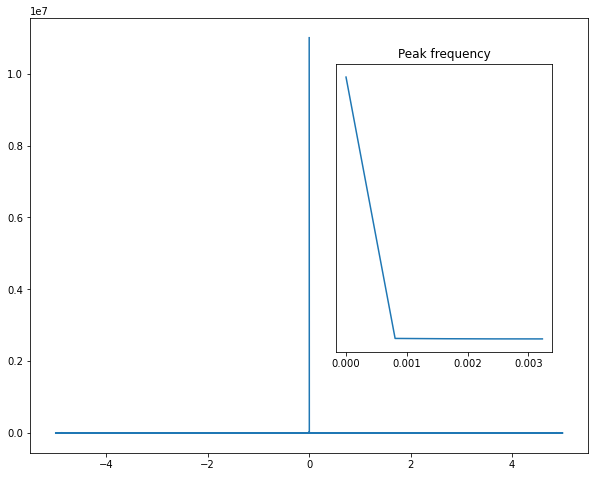

In [19]:
from scipy import fftpack

timestep = 0.1
cs_AccZ = np.asarray(cs['AccZ'])
cs_AccZ_fft = np.abs(fftpack.fft(cs_AccZ))
cs_AccZ_freq = fftpack.fftfreq(cs_AccZ.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccZ_freq, cs_AccZ_fft)


pos_mask = np.where(cs_AccZ_freq > 0)
freq_Z1 = cs_AccZ_freq[pos_mask]
peak_freq = freq_Z1[cs_AccZ_fft[pos_mask].argmax()]
print(peak_freq)


axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(cs_AccZ_freq[:5], cs_AccZ_fft[:5]) #Idk here how to plot in ok way our peak
plt.setp(axes, yticks=[])

0.008078196946441553


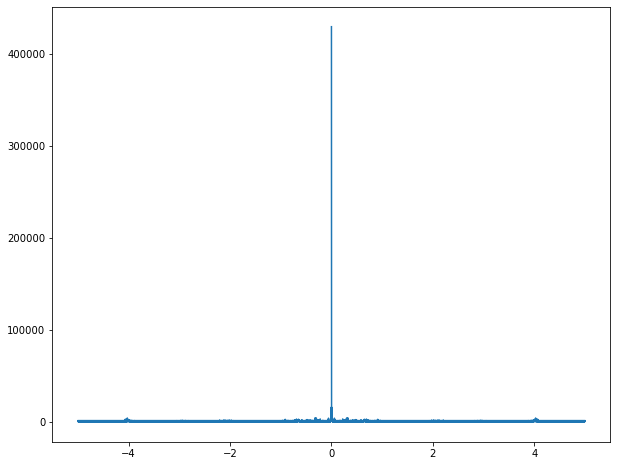

In [20]:
cs_AccX = np.asarray(cs['AccX'])
cs_AccX_fft = np.abs(fftpack.fft(cs_AccX))
cs_AccX_freq = fftpack.fftfreq(cs_AccX.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccX_freq, cs_AccX_fft)


pos_mask = np.where(cs_AccX_freq > 0)
freq_X1 = cs_AccZ_freq[pos_mask]
peak_freq = freq_Z1[cs_AccX_fft[pos_mask].argmax()]
print(peak_freq)

0.0008078196946441553


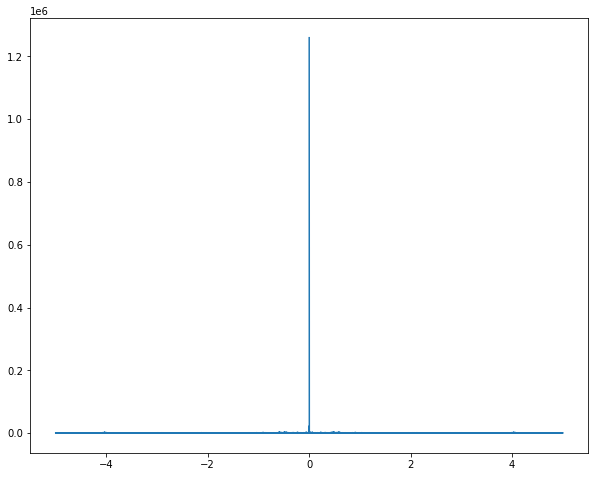

In [21]:
cs_AccY = np.asarray(cs['AccY'])
cs_AccY_fft = np.abs(fftpack.fft(cs_AccY))
cs_AccY_freq = fftpack.fftfreq(cs_AccY.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccY_freq, cs_AccY_fft)


pos_mask = np.where(cs_AccY_freq > 0)
freq_Y1 = cs_AccY_freq[pos_mask]
peak_freq = freq_Y1[cs_AccY_fft[pos_mask].argmax()]
print(peak_freq)

# Mattress data to be analysed here

In [22]:
### README5 smth mattress data
acc_offsets5 = np.array([3.602701, -20.96658, 54.97186])
ms['AccX'] += acc_offsets5[0]
ms['AccY'] += acc_offsets5[1]
ms['AccZ'] += acc_offsets5[2]